# Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

# Carregamento dos dataset de resultados

In [27]:
#usuario= "igorcapeletti"
usuario= "igorubuntu"

nome_pasta_resultado= 'resultados1'
raiz= f"/home/{usuario}/github/tcc_eBPF_XDP/experimentos/{nome_pasta_resultado}"

df_gerador = pd.read_csv(f'{raiz}/resultado_geral_gerador.csv', sep=',', engine='python')
df_perf = pd.read_csv(f'{raiz}/resultado_geral_perf.csv', sep=',', engine='python')
df_sar = pd.read_csv(f'{raiz}/resultado_geral_sar.csv', sep=',', engine='python')

df = pd.concat([df_gerador,df_perf], sort = False)
print(df.columns)

format_imagens= '.jpg'


Index(['combined', 'algoritmo', 'packet_size', 'hook_ebpf', 'var_ip',
       'timeout', 'rx_packets', 'rx_packet_rate_avg', 'rx_packet_rate',
       'task_clock', 'context_switches', 'cpu_migrations', 'page_faults',
       'cycles', 'instructions', 'branches', 'branch_misses',
       'L1_dcache_loads', 'L1_dcache_load_misses', 'LLC_loads',
       'LLC_load_misses', 'L1_icache_load_misses', 'dTLB_loads',
       'dTLB_load_misses', 'iTLB_loads', 'iTLB_load_misses'],
      dtype='object')


In [4]:
lista_combined= [1,2,4,8]
lista_for= [0,100,200,400,800,1600,3200,6400,12800]
lista_hook_xdp= ['xdpgeneric','xdpdvr']
lista_pacotes= [64,128,256,512,1024,1500]

# Resultados do gerador

### 1 Taxa de transferência de pacotes processados por:

#### 1.1 Hook XDP (generic, native)
<ul>
  <li>1.1.1 Variando os laços de repetição</li>
  <li>1.1.2 Variando o tamanho dos pacotes</li>
  <li>1.1.3 Variando as filas tx/rx</li>
</ul>

1.1.1 Qual a diferença de desempenho entre os **Hooks eBPF/XDP *generic* e *native*** para os diferentes tamanhos de laços de repetição?

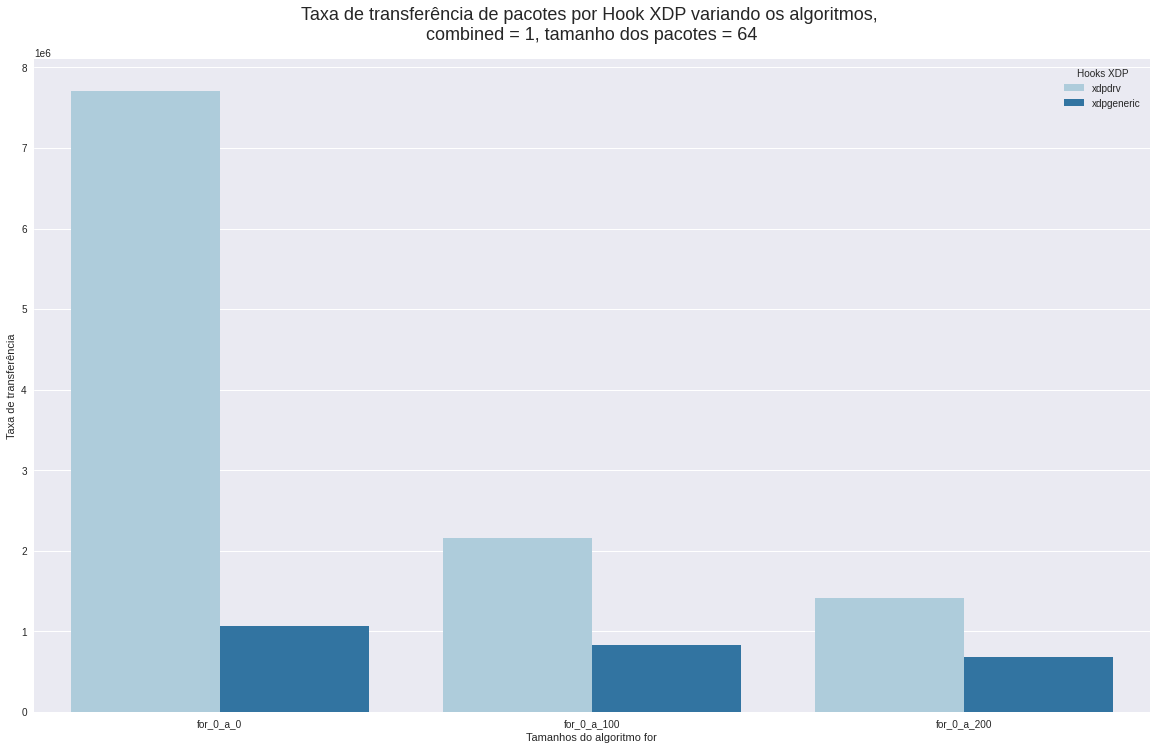

In [34]:
it_combined=1
it_packet_size= 64

plt.rc('figure', figsize=(20, 12))
df_pergunta1= df[df.combined == it_combined]
df_pergunta1= df_pergunta1[df_pergunta1.packet_size == it_packet_size]
df_pergunta1= df_pergunta1.sort_values(by=['rx_packet_rate','hook_ebpf'], ascending=False)
df_pergunta1= df_pergunta1[['algoritmo','hook_ebpf','rx_packet_rate']]

ax = sns.barplot(y="rx_packet_rate", x='algoritmo', hue='hook_ebpf', data=df_pergunta1, palette='Paired');
ax.set_title(f'Taxa de transferência de pacotes por Hook XDP variando os algoritmos, \ncombined = {it_combined}, tamanho dos pacotes = {it_packet_size}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência')
ax.set_xlabel('Tamanhos do algoritmo for')
ax.legend(title = "Hooks XDP")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/dif_hooks_para_dif_algortimos@combined_{it_combined}_packet_size_{it_packet_size}{format_imagens}')

1.1.2 Qual a diferença de desempenho entre os **Hooks eBPF/XDP *generic* e *native*** para os diferentes tamanhos de pacotes?

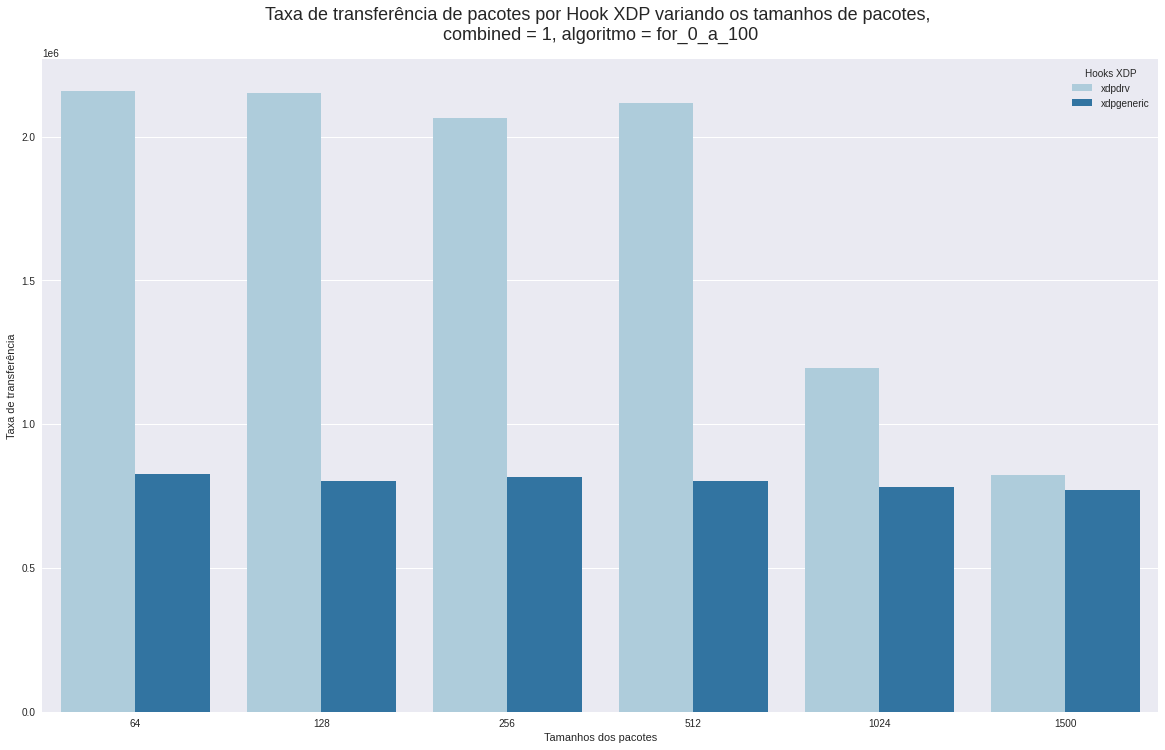

In [36]:
it_combined=1
algoritmo= 'for_0_a_100'

plt.rc('figure', figsize=(20, 12))
df_pergunta1= df[df.combined == it_combined]
df_pergunta1= df_pergunta1[df_pergunta1.algoritmo == algoritmo]
df_pergunta1= df_pergunta1.sort_values(by=['rx_packet_rate','packet_size'], ascending=False)
df_pergunta1= df_pergunta1[['packet_size','hook_ebpf','rx_packet_rate']]

ax = sns.barplot(y="rx_packet_rate", x='packet_size', hue='hook_ebpf', data=df_pergunta1, palette='Paired');
ax.set_title(f'Taxa de transferência de pacotes por Hook XDP variando os tamanhos de pacotes, \ncombined = {it_combined}, algoritmo = {algoritmo}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência')
ax.set_xlabel('Tamanhos dos pacotes')
ax.legend(title = "Hooks XDP")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/dif_hooks_para_dif_tam_packets@combined{it_combined}_algoritmo_{algoritmo}{format_imagens}')

1.1.3 Qual a diferença de desempenho entre os **Hooks eBPF/XDP *generic* e *native*** para os diferentes tamanhos de filas TX/RX de processamento?

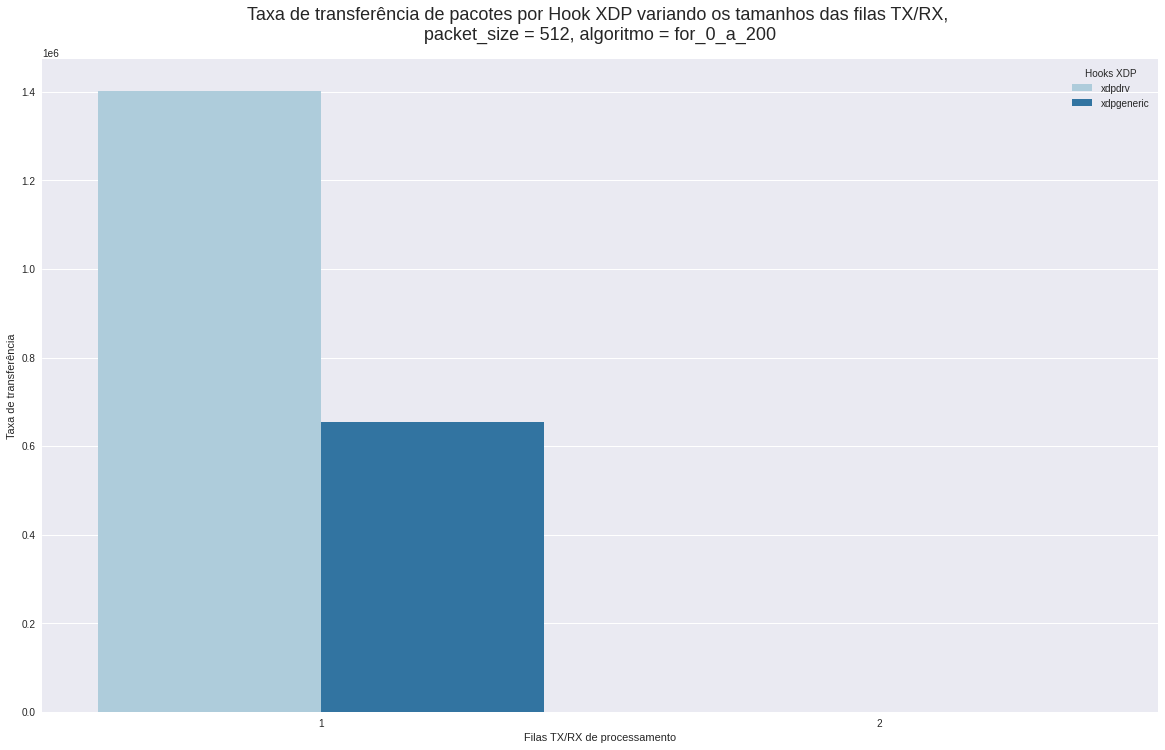

In [37]:
packet_size= 512
algoritmo= 'for_0_a_200'

plt.rc('figure', figsize=(20, 12))
df_pergunta1= df[df.packet_size == packet_size]
df_pergunta1= df_pergunta1[df_pergunta1.algoritmo == algoritmo]
df_pergunta1= df_pergunta1.sort_values(by=['rx_packet_rate','combined'], ascending=False)
df_pergunta1= df_pergunta1[['combined','hook_ebpf','rx_packet_rate']]

ax = sns.barplot(y="rx_packet_rate", x='combined', hue='hook_ebpf', data=df_pergunta1, palette='Paired');
ax.set_title(f'Taxa de transferência de pacotes por Hook XDP variando os tamanhos das filas TX/RX, \npacket_size = {packet_size}, algoritmo = {algoritmo}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência')
ax.set_xlabel('Filas TX/RX de processamento')
ax.legend(title = "Hooks XDP")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/dif_hooks_para_dif_combineds@packet_size{packet_size}_algoritmo_{algoritmo}{format_imagens}')

#### 1.2 Iterações de laço de repetição
<ul>
  <li>1.2.1 Variando os Hooks XDP</li>
  <li>1.2.2 Variando o tamanho dos pacotes</li>
  <li>1.2.3 Variando as filas tx/rx</li>
</ul>

1.2.1 Qual a diferença de desempenho entre os **Laços de Repetição** para os diferentes Hooks do XDP?

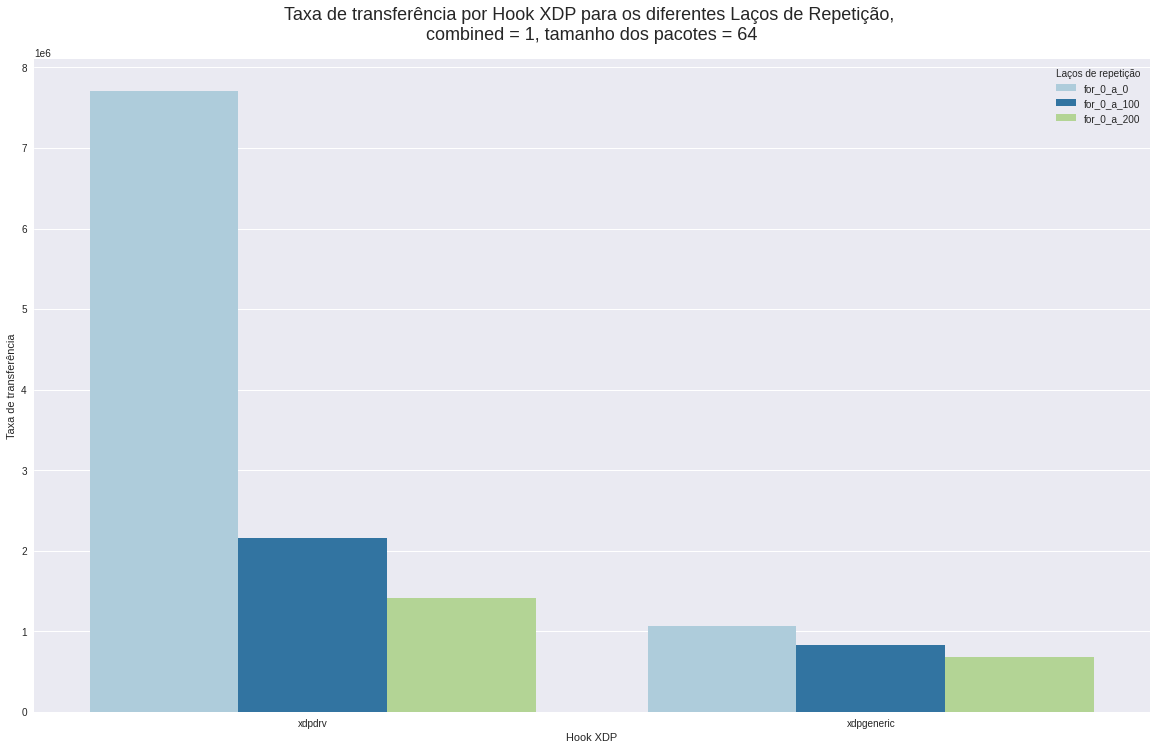

In [40]:
it_combined=1
it_packet_size= 64

plt.rc('figure', figsize=(20, 12))
df_pergunta1= df[df.combined == it_combined]
df_pergunta1= df_pergunta1[df_pergunta1.packet_size == it_packet_size]
df_pergunta1= df_pergunta1.sort_values(by=['rx_packet_rate','hook_ebpf'], ascending=False)
df_pergunta1= df_pergunta1[['algoritmo','hook_ebpf','rx_packet_rate']]

ax = sns.barplot(y="rx_packet_rate", x='hook_ebpf', hue='algoritmo', data=df_pergunta1, palette='Paired');
ax.set_title(f'Taxa de transferência por Hook XDP para os diferentes Laços de Repetição, \ncombined = {it_combined}, tamanho dos pacotes = {it_packet_size}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência')
ax.set_xlabel('Hook XDP')
ax.legend(title = "Laços de repetição")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/dif_for_para_dif_hooks@combined_{it_combined}_packet_size_{it_packet_size}{format_imagens}')

#### 1.3 Tamanho de pacote
<ul>
  <li>1.3.1 Variando os Hooks XDP</li>
  <li>1.3.2 Variando os laços de repetição</li>
  <li>1.3.3 Variando filas tx/rx</li>
</ul>

#### 1.4 Quantidade de filas TX/RX para processamento
<ul>
  <li>1.4.1 Variando os Hooks XDP</li>
  <li>1.4.2 Variando os laços de repetição</li>
  <li>1.4.3 Variando o tamanho dos pacotes<</li>
</ul>

In [ ]:
#3.1.1 Qual a quantidade de pacotes processados variando o tamanho dos laços for e a quantidade de pacotes?
it_combined=4
it_hook_ebpf= "xdpgeneric"

plt.rc('figure', figsize=(20, 12))
df_pergunta1= df[df.combined == it_combined]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == it_hook_ebpf]
df_pergunta1= df_pergunta1.sort_values(by=['rx_packets','algoritmo'], ascending=False)
df_pergunta1= df_pergunta1[['algoritmo','packet_size','rx_packets','rx_packet_rate_avg','rx_packet_rate']]

ax = sns.barplot(y="rx_packets", x='algoritmo', hue='packet_size', data=df_pergunta1, palette='Paired');
ax.set_title(f'Quantidade de pacotes processados variando o tamanho do loop e o tamanho de pacotes, com Hook {it_hook_ebpf} e {it_combined} fila tx/rx', fontsize=18, pad=50);
ax.set_ylabel('Quantidade de pacotes')
ax.set_xlabel('Tamanhos do algoritmo for')
ax.legend(title = "Tamanho dos pacotes")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/pergunta1_combined{it_combined}_hook_{it_hook_ebpf}.pdf')

In [ ]:
#3.1.1 Qual a quantidade de pacotes processados variando o tamanho dos laços for e a quantidade de pacotes?
it_combined=8
it_hook_ebpf= "xdpgeneric"

plt.rc('figure', figsize=(20, 12))
df_pergunta1= df[df.combined == it_combined]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == it_hook_ebpf]
df_pergunta1= df_pergunta1.sort_values(by=['rx_packets','algoritmo'], ascending=False)
df_pergunta1= df_pergunta1[['algoritmo','packet_size','rx_packets','rx_packet_rate_avg','rx_packet_rate']]

ax = sns.barplot(y="rx_packets", x='algoritmo', hue='packet_size', data=df_pergunta1, palette='Paired');
ax.set_title(f'Quantidade de pacotes processados variando o tamanho do loop e o tamanho de pacotes, com Hook {it_hook_ebpf} e {it_combined} fila tx/rx', fontsize=18, pad=50);
ax.set_ylabel('Quantidade de pacotes')
ax.set_xlabel('Tamanhos do algoritmo for')
ax.legend(title = "Tamanho dos pacotes")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/pergunta1_combined{it_combined}_hook_{it_hook_ebpf}.pdf')

In [ ]:
#3.1.1 Qual a quantidade de pacotes processados variando o tamanho dos laços for e a quantidade de pacotes?
it_combined=1
it_hook_ebpf= "xdpdrv"

plt.rc('figure', figsize=(20, 12))
df_pergunta1= df[df.combined == it_combined]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == it_hook_ebpf]
df_pergunta1= df_pergunta1.sort_values(by=['rx_packets','algoritmo'], ascending=False)
df_pergunta1= df_pergunta1[['algoritmo','packet_size','rx_packets','rx_packet_rate_avg','rx_packet_rate']]

ax = sns.barplot(y="rx_packets", x='algoritmo', hue='packet_size', data=df_pergunta1, palette='Paired');
ax.set_title(f'Quantidade de pacotes processados variando o tamanho do loop e o tamanho de pacotes, com Hook {it_hook_ebpf} e {it_combined} fila tx/rx', fontsize=18, pad=50);
ax.set_ylabel('Quantidade de pacotes')
ax.set_xlabel('Tamanhos do algoritmo for')
ax.legend(title = "Tamanho dos pacotes")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/pergunta1_combined{it_combined}_hook_{it_hook_ebpf}.pdf')

In [ ]:
#3.1.1 Qual a quantidade de pacotes processados variando o tamanho dos laços for e a quantidade de pacotes?
it_combined=2
it_hook_ebpf= "xdpdrv"

plt.rc('figure', figsize=(20, 12))
df_pergunta1= df[df.combined == it_combined]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == it_hook_ebpf]
df_pergunta1= df_pergunta1.sort_values(by=['rx_packets','algoritmo'], ascending=False)
df_pergunta1= df_pergunta1[['algoritmo','packet_size','rx_packets','rx_packet_rate_avg','rx_packet_rate']]

ax = sns.barplot(y="rx_packets", x='algoritmo', hue='packet_size', data=df_pergunta1, palette='Paired');
ax.set_title(f'Quantidade de pacotes processados variando o tamanho do loop e o tamanho de pacotes, com Hook {it_hook_ebpf} e {it_combined} fila tx/rx', fontsize=18, pad=50);
ax.set_ylabel('Quantidade de pacotes')
ax.set_xlabel('Tamanhos do algoritmo for')
ax.legend(title = "Tamanho dos pacotes")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/pergunta1_combined{it_combined}_hook_{it_hook_ebpf}.pdf')

In [ ]:
#3.1.1 Qual a quantidade de pacotes processados variando o tamanho dos laços for e a quantidade de pacotes?
it_combined=4
it_hook_ebpf= "xdpdrv"

plt.rc('figure', figsize=(20, 12))
df_pergunta1= df[df.combined == it_combined]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == it_hook_ebpf]
df_pergunta1= df_pergunta1.sort_values(by=['rx_packets','algoritmo'], ascending=False)
df_pergunta1= df_pergunta1[['algoritmo','packet_size','rx_packets','rx_packet_rate_avg','rx_packet_rate']]

ax = sns.barplot(y="rx_packets", x='algoritmo', hue='packet_size', data=df_pergunta1, palette='Paired');
ax.set_title(f'Quantidade de pacotes processados variando o tamanho do loop e o tamanho de pacotes, com Hook {it_hook_ebpf} e {it_combined} fila tx/rx', fontsize=18, pad=50);
ax.set_ylabel('Quantidade de pacotes')
ax.set_xlabel('Tamanhos do algoritmo for')
ax.legend(title = "Tamanho dos pacotes")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/pergunta1_combined{it_combined}_hook_{it_hook_ebpf}.pdf')

In [ ]:
#3.1.1 Qual a quantidade de pacotes processados variando o tamanho dos laços for e a quantidade de pacotes?
it_combined=8
it_hook_ebpf= "xdpdrv"

plt.rc('figure', figsize=(20, 12))
df_pergunta1= df[df.combined == it_combined]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == it_hook_ebpf]
df_pergunta1= df_pergunta1.sort_values(by=['rx_packets','algoritmo'], ascending=False)
df_pergunta1= df_pergunta1[['algoritmo','packet_size','rx_packets','rx_packet_rate_avg','rx_packet_rate']]

ax = sns.barplot(y="rx_packets", x='algoritmo', hue='packet_size', data=df_pergunta1, palette='Paired');
ax.set_title(f'Quantidade de pacotes processados variando o tamanho do loop e o tamanho de pacotes, com Hook {it_hook_ebpf} e {it_combined} fila tx/rx', fontsize=18, pad=50);
ax.set_ylabel('Quantidade de pacotes')
ax.set_xlabel('Tamanhos do algoritmo for')
ax.legend(title = "Tamanho dos pacotes")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/pergunta1_combined{it_combined}_hook_{it_hook_ebpf}.pdf')

In [ ]:
#3.1.1 Qual a quantidade de pacotes processados variando o tamanho dos laços for e a quantidade de pacotes?
plt.rc('figure', figsize=(20, 12))
it_combined= 1
it_hook_ebpf= "xdpgeneric"
df_pergunta1= df[df.combined == it_combined]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == it_hook_ebpf]
df_pergunta1= df_pergunta1.sort_values(by=['rx_packets','algoritmo'], ascending=False)
df_pergunta1= df_pergunta1[['algoritmo','packet_size','rx_packets','rx_packet_rate_avg','rx_packet_rate']]

ax = sns.barplot(y="rx_packets", x='algoritmo', hue='packet_size', data=df_pergunta1, palette='Paired');
ax.set_title(f'Quantidade de pacotes processados variando o tamanho do loop e o tamanho de pacotes, com Hook {it_hook_ebpf} e {it_combined} fila tx/rx', fontsize=18, pad=50);
ax.set_ylabel('Quantidade de pacotes')
ax.set_xlabel('Tamanhos do algoritmo for')
ax.legend(title = "Tamanho dos pacotes")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/pergunta1.pdf')

### 3.2 Perguntas quanto a vazao dos pacotes

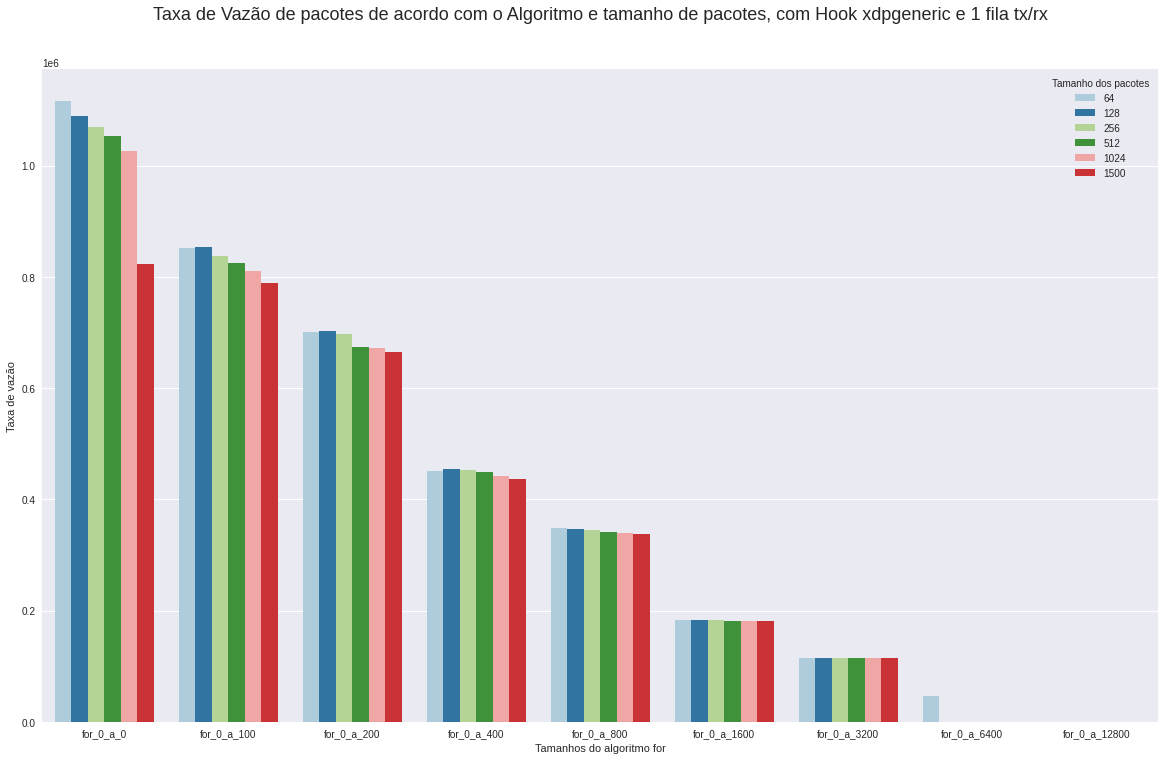

In [36]:
#3.2.1 Qual a taxa de vazão de pacotes variando o tamanho do loop e o tamanho dos pacotes?
plt.rc('figure', figsize=(20, 12))
it_combined= 1
it_hook_ebpf= "xdpgeneric"
df_pergunta2= df[df.combined == it_combined]
df_pergunta2= df_pergunta2[df_pergunta2.hook_ebpf == it_hook_ebpf]
df_pergunta2= df_pergunta2.sort_values(by=['rx_packet_rate','algoritmo'], ascending=False)
df_pergunta2= df_pergunta2[['algoritmo','packet_size','rx_packets','rx_packet_rate_avg','rx_packet_rate']]
ax = sns.barplot(y="rx_packet_rate", x='algoritmo', hue='packet_size', data=df_pergunta2, palette='Paired');
ax.set_title(f'Taxa de Vazão de pacotes de acordo com o Algoritmo e tamanho de pacotes, com Hook {it_hook_ebpf} e {it_combined} fila tx/rx', fontsize=18, pad=50);
ax.set_ylabel("Taxa de vazão")
ax.set_xlabel('Tamanhos do algoritmo for')
ax.legend(title = "Tamanho dos pacotes")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/pergunta2.pdf')

### 3.3 Qual a taxa